단순 선형회귀 분석

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 선형회귀 관련 scikit-leran library
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm


In [3]:
# 간단한 예제
print(np.array([[0],[1],[2]]))

[[0]
 [1]
 [2]]


In [4]:
print(np.array([0,1.2,1.6]))

[0.  1.2 1.6]


In [5]:
x = np.array([[0],[1],[2]])
y = np.array([0, 1.2,1.6])

lr = linear_model.LinearRegression()

# 훈련
lr.fit(x,y)

LinearRegression()

In [6]:
# training data 예측
pred_train = lr.predict(x)
pred_train

array([0.13333333, 0.93333333, 1.73333333])

In [7]:
# test
pred_test = lr.predict([[1.5]])
pred_test

array([1.33333333])

In [11]:
# 기울기 (coefficient, coef_)
lr.coef_

array([0.8])

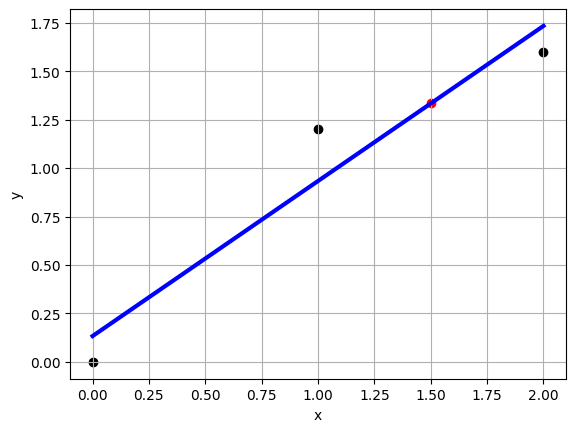

In [10]:
# 시각화

plt.scatter(x,y, color='black')
plt.scatter(1.5, pred_test, color='red') # 예측한 값
plt.plot(x, pred_train, color='blue', linewidth=3)

plt.xlabel('x')
plt.ylabel('y')

plt.grid()
plt.show()

In [14]:
pd.read_csv('Advertising.csv')

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [15]:
ad = pd.read_csv('Advertising.csv', index_col=0)
ad.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [16]:
ad.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [17]:
# 선형회귀 모델 적용

# train/teset data 분리 >> 과적합 방지
train = ad[:-20]
test = ad[-20:]

# training data의 feature와 response 분리
train_x = train[['TV', 'Radio', 'Newspaper']]
train_y = train[["Sales"]]

# test data의 feature와 response 분리
test_x = test[['TV', 'Radio', 'Newspaper']]
test_y = test[["Sales"]]

In [18]:
train_x, train_y

(        TV  Radio  Newspaper
 1    230.1   37.8       69.2
 2     44.5   39.3       45.1
 3     17.2   45.9       69.3
 4    151.5   41.3       58.5
 5    180.8   10.8       58.4
 ..     ...    ...        ...
 176  276.9   48.9       41.8
 177  248.4   30.2       20.3
 178  170.2    7.8       35.2
 179  276.7    2.3       23.7
 180  165.6   10.0       17.6
 
 [180 rows x 3 columns],
      Sales
 1     22.1
 2     10.4
 3      9.3
 4     18.5
 5     12.9
 ..     ...
 176   27.0
 177   20.2
 178   11.7
 179   11.8
 180   12.6
 
 [180 rows x 1 columns])

In [19]:
test_x, test_y

(        TV  Radio  Newspaper
 181  156.6    2.6        8.3
 182  218.5    5.4       27.4
 183   56.2    5.7       29.7
 184  287.6   43.0       71.8
 185  253.8   21.3       30.0
 186  205.0   45.1       19.6
 187  139.5    2.1       26.6
 188  191.1   28.7       18.2
 189  286.0   13.9        3.7
 190   18.7   12.1       23.4
 191   39.5   41.1        5.8
 192   75.5   10.8        6.0
 193   17.2    4.1       31.6
 194  166.8   42.0        3.6
 195  149.7   35.6        6.0
 196   38.2    3.7       13.8
 197   94.2    4.9        8.1
 198  177.0    9.3        6.4
 199  283.6   42.0       66.2
 200  232.1    8.6        8.7,
      Sales
 181   10.5
 182   12.2
 183    8.7
 184   26.2
 185   17.6
 186   22.6
 187   10.3
 188   17.3
 189   15.9
 190    6.7
 191   10.8
 192    9.9
 193    5.9
 194   19.6
 195   17.3
 196    7.6
 197    9.7
 198   12.8
 199   25.5
 200   13.4)

In [20]:
# 모델링
# 선형회귀

lr = linear_model.LinearRegression()

lr.fit(train_x[['TV']], train_y) # training data 중 TV만 사용

LinearRegression()

In [23]:
# 훈련용 데이터 이용 >> 예측
train_y_pred = lr.predict(train_x[['TV']])
train_y_pred[:3]

array([[17.95508512],
       [ 9.25168867],
       [ 7.97150159]])

In [24]:
# 평가용 데이터 이용 >> 예측
test_y_pred = lr.predict(test_x[['TV']])
test_y_pred[:3]

array([[14.50842759],
       [17.41112285],
       [ 9.80034028]])

In [25]:
# 기울기
lr.coef_

array([[0.0468933]])

In [26]:
# 훈련용 MSE
mean_squared_error(train_y, train_y_pred)

10.316339960041685

In [27]:
# 평가용 MSE
mean_squared_error(test_y, test_y_pred)

12.324071145849311

In [28]:
# 훈련용 데이터에 대한 결정계수(R^2)
r2_score(train_y, train_y_pred)

0.6072402179372907

In [30]:
# statsmodels 활용, 선형회귀분석

# statsmodels의 OLS 함수는 데이터 내에 intercept하는 feature 필요
sm_train_x = train_x
sm_train_x['x0'] = 1

sm_test_x = test_x
sm_test_x['x0'] = 1

In [31]:
sm_train_x

,TV,Radio,Newspaper,x0
1,230.1,37.8,69.2,1
2,44.5,39.3,45.1,1
3,17.2,45.9,69.3,1
4,151.5,41.3,58.5,1
5,180.8,10.8,58.4,1
...,...,...,...,...
176,276.9,48.9,41.8,1
177,248.4,30.2,20.3,1
178,170.2,7.8,35.2,1
179,276.7,2.3,23.7,1


In [32]:
# 훈련
results = sm.OLS(train_y, sm_train_x[["x0", 'TV']]).fit()

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     275.2
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           5.76e-38
Time:                        07:35:49   Log-Likelihood:                -465.44
No. Observations:                 180   AIC:                             934.9
Df Residuals:                     178   BIC:                             941.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0             7.1649      0.478     14.978      0.000       6.221       8.109
TV             0.0469      0.003     16.589      0.000       0.041       0.052
==============================================================================
Omnibus:                        0.515   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.773   Jarque-Bera (JB):                0.547
Skew:                          -0.127   Prob(JB):                        0.761
Kurtosis:                       2.906   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

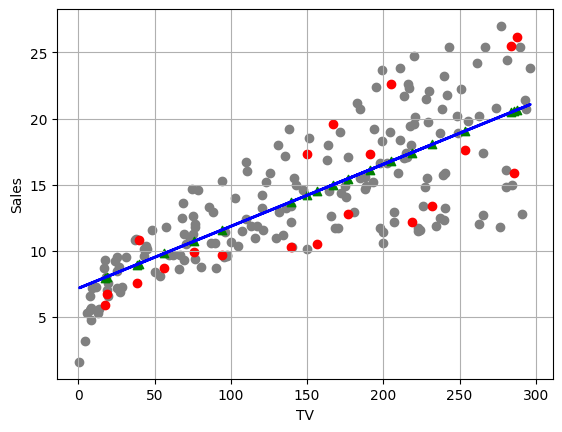

In [36]:
#plot outpus
plt.scatter(train_x['TV'], train_y['Sales'], color='gray') # train data
plt.scatter(test_x['TV'], test_y['Sales'], color='red') # test data
plt.plot(train_x['TV'], train_y_pred, color='blue', linewidth=2)
plt.scatter(test_x['TV'],test_y_pred, color='green',marker="^")

plt.xlabel('TV')
plt.ylabel('Sales')
plt.grid()
plt.show()

In [ ]:
|